About Dataset

**Sales Prediction for Big Mart Outlets**

Indented blockThe data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.



In [13]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [112]:
train_data = pd.read_csv('/content/Train _sales.csv')

In [113]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [114]:
train_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [115]:
train_data.shape

(8523, 12)

In [116]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [117]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [118]:
train_data.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

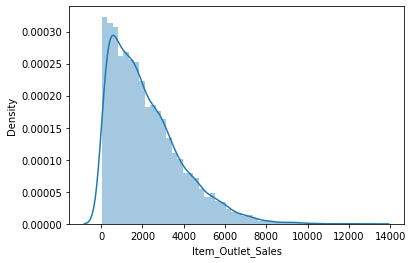



skewness: 1.177531
kurtosis: 1.615877


In [119]:
#kernel density plot
sns.distplot(train_data.Item_Outlet_Sales)
plt.show()
print('\n')
print("skewness: %f" % train_data ["Item_Outlet_Sales" ].skew())
print("kurtosis: %f" % train_data ["Item_Outlet_Sales" ].kurt())

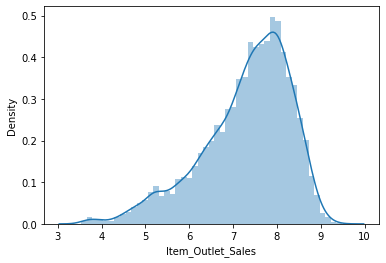

skewness: -0.882266
kurtosis: 0.532920


In [121]:
#log transformation used to transform skwed data to approximately conform to normality

#log transform the target
train_data["Item_Outlet_Sales"] =np.log1p(train_data["Item_Outlet_Sales"])

#kernel Density plot
sns.distplot(train_data.Item_Outlet_Sales);
plt.show()

print("skewness: %f" % train_data["Item_Outlet_Sales"].skew())
print("kurtosis: %f" % train_data["Item_Outlet_Sales"].kurt())


In [123]:
train_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [124]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
train_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [126]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [127]:
train_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [128]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

In [129]:
train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [131]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,6.597664
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,6.903451


In [132]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [133]:
num=train_data._get_numeric_data() 
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,8.225808
1,5.92,0.019278,48.2692,2009,6.096776
2,17.50,0.016760,141.6180,1999,7.648868
3,19.20,0.000000,182.0950,1998,6.597664
4,8.93,0.000000,53.8614,1987,6.903451


In [134]:
cat=train_data.drop(num,axis=1)
cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,Medium,Tier 3,Grocery Store
4,Low Fat,Household,High,Tier 3,Supermarket Type1


In [135]:
dummies_train =pd.get_dummies(cat)
dummies_train


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [136]:
final_train=num.join(dummies_train)
final_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,8.225808,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,6.096776,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,7.648868,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,6.597664,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,6.903451,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Ridge_Regression model building using pandas and numpy

In [71]:
import numpy as np
import pandas as pd

class RidgeRegression:

    # initiating the hyperparameters
    def __init__(self, lambda_parameter, no_of_iterations, learning_rate):
        self.lambda_parameter = lambda_parameter
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = np.mean(y)
        for i in range(self.no_of_iterations):
            coef_w = np.copy(self.w)
            for j in range(X.shape[1]):
                X_j = X[:,j]
                X_not_j = np.delete(X, j, axis=1)
                y_pred = self.b + X_not_j.dot(self.w[np.arange(X.shape[1]) != j])
                residual_j = X_j.dot(y - y_pred)
                if residual_j < -self.lambda_parameter/2:
                    self.w[j] = (residual_j + self.lambda_parameter/2) / np.sum(X_j**2)
                elif residual_j > self.lambda_parameter/2:
                    self.w[j] = (residual_j - self.lambda_parameter/2) / np.sum(X_j**2)
                else:
                    self.w[j] = 0
            if np.linalg.norm(self.w - coef_w) < self.learning_rate:
                break
    # Predicting the Target variable
    def predict(self, X):
        return self.b + X.dot(self.w)
    # R-squared coefficient to evaluate the model
    def r_squared(self, X, y):
        y_pred = self.predict(X)
        SS_res = np.sum((y - y_pred)**2)
        SS_tot = np.sum((y - np.mean(y))**2)
        return 1 - (SS_res / SS_tot)
    # Cross Validation score for K-fold cross validation
    def cross_val_score(self, X, y, k=5):
        n = X.shape[0]
        idx = np.arange(n)
        np.random.shuffle(idx)
        X_folds = np.array_split(X[idx], k)
        y_folds = np.array_split(y[idx], k)
        scores = []
        for i in range(k):
            X_train = np.vstack(X_folds[:i] + X_folds[i+1:])
            y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
            X_valid = X_folds[i]
            y_valid = y_folds[i]
            self.fit(X_train, y_train)
            score = self.r_squared(X_valid, y_valid)
            scores.append(score)
        return scores
    # Grid search to tune the hyperparameters
    def grid_search(self, X, y, param_grid, k=5):
        best_score = -np.inf
        best_params = None
        for params in param_grid:
            self.lambda_parameter = params['lambda']
            self.no_of_iterations = params['iterations']
            self.learning_rate = params['learning_rate']
            scores = self.cross_val_score(X, y, k=k)
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
        self.lambda_parameter = best_params['lambda']
        self.no_of_iterations = best_params['iterations']
        self.learning_rate = best_params['learning_rate']
    # Get coefficients of the model
    def get_coefficients(self):
        return self.w, self.b


In [143]:
from sklearn.model_selection import train_test_split

X = final_train.drop('Item_Outlet_Sales', axis=1)
y = final_train['Item_Outlet_Sales']
     
Ridge_model = RidgeRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.001)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ridge_model.fit(X_train.values, y_train)

In [141]:
param_grid = {'lambda': [0.001, 0.01, 0.1, 1, 10],
              'iterations': [100, 500, 1000],
              'learning_rate': [0.001, 0.01, 0.1]}
for params in param_grid:
    lambda_parameter = params[0]
    no_of_iterations = params[1]
    learning_rate = params[2]
             
Ridge_model = RidgeRegression(lambda_parameter=0.1, no_of_iterations=1000, learning_rate=0.01)

# Print the best hyperparameters and the corresponding cross-validation score
print('Cross-validation score:', np.mean(Ridge_model.cross_val_score(X_train.values, y_train.values, k=5)))
print('Best hyperparameters:', Ridge_model.lambda_parameter, Ridge_model.no_of_iterations, Ridge_model.learning_rate)



Cross-validation score: 0.7107674171501974
Best hyperparameters: 0.1 1000 0.01


In [145]:
y_pred = Ridge_model.predict(X_test.values)
print(y_pred)

[6.94260796 6.74669466 6.71874731 ... 5.9417747  7.44451948 8.31853709]


In [104]:
y_pred = Ridge_model.predict(X_test.values)

mse = ((y_test.values - y_pred) ** 2).mean()
rmse = np.sqrt(mse)
mae = np.abs(y_test.values - y_pred).mean()
ssr = ((y_pred - y_test.values) ** 2).sum()
sst = ((y_test.values - y_test.values.mean()) ** 2).sum()
r_squared = 1 - (ssr / sst)

# Print the error metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)


Mean Squared Error: 0.2888890820931999
Root Mean Squared Error: 0.5374840296168807
Mean Absolute Error: 0.41731488780714404
R-squared: 0.7260167744442093


TEST Data

In [79]:
test_data= pd.read_csv("/content/Test _sales.csv")

In [80]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [81]:
test_data.shape

(5681, 11)

In [82]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [83]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [84]:
test_data.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [85]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'})
test_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [87]:
test_data['Item_Weight'].fillna(test_data['Item_Weight'].median(),inplace=True)
     

In [88]:
test_data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [89]:
test_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [90]:
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)
     

In [91]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [92]:
test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [93]:
test_num=test_data._get_numeric_data() 
test_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,12.500,0.118599,234.2300,1985


In [94]:
test_cat=test_data.drop(test_num,axis=1)
test_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,Regular,Dairy,Medium,Tier 2,Supermarket Type1
2,Low Fat,Others,Medium,Tier 3,Grocery Store
3,Low Fat,Snack Foods,Medium,Tier 2,Supermarket Type1
4,Regular,Dairy,Medium,Tier 3,Supermarket Type3


In [138]:
dum_test=pd.get_dummies(test_cat)
dum_test.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [139]:
final_test=test_num.join(dum_test)
final_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.500,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [146]:

y_pred_test = Ridge_model.predict(final_test)
print(y_pred_test)

0       7.227328
1       7.025598
2       6.403663
3       7.651947
4       8.739395
          ...   
5676    7.557255
5677    7.551898
5678    7.372798
5679    8.164483
5680    7.037801
Length: 5681, dtype: float64


In [107]:
# assuming y_pred_test is a pandas Series object
y_pred_test = y_pred_test.to_frame() 

# add a column with the label "predicted_target"
y_pred_test.columns = ["Outlet_Sales"]

# display the first few rows of the DataFrame with the new label
print(y_pred_test.head())


   Outlet_Sales
0      7.227328
1      7.025598
2      6.403663
3      7.651947
4      8.739395


In [108]:
final_test=pd.concat([test_data,y_pred_test],axis=1)

In [109]:
final_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Sales
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1,7.227328
1,8.300,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1,7.025598
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store,6.403663
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1,7.651947
4,12.500,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3,8.739395
